# Online Retail Exploratory Data Analysis with Python

## project scenario

In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## objective

* Describe data to answer key questions to uncover insights

* Gain valuable insights that will help improve online retail performance

* Provide analytic insights and data-driven recommendations

## chanlenges

Your challenge will be to conduct an exploratory data analysis to help make key business decisions. To do this, you will load, clean, process, analyze, and visualize data. You will also pose questions, and seek to answer them meaningfully using the dataset provided.

In this project, we'll use a data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

## load the data with important libraries

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import datetime as dt
# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

## dataset

* InvoiceNo: Invoice number of the transaction
* StockCode: Unique code of the product
* Description: Description of the product
* Quantity: Quantity of the product in the transaction
* InvoiceDate: Date and time of the transaction
* UnitPrice: Unit price of the product
* CustomerID: Unique identifier of the customer
* Country: Country where the transaction occurred

In [82]:
df0 = pd.read_csv('online_retail.csv', encoding='latin-1')
df0.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


## tasks

* Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
* Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
* Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
* Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
* Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
* Explore the top-selling products and countries based on the quantity sold.
* Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
* Draw conclusions and summarize your findings from the exploratory data analysis.

## data cleaning

In [83]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [84]:
df0.shape

(541909, 8)

In [85]:
# check for duplicates
df0.duplicated().sum()

5268

### let's drop the duplicates

In [86]:
df1 = df0.drop_duplicates()

In [87]:
df1.duplicated().sum()

0

### mising values

In [88]:
df1.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [89]:
#let's drop all rows containing missing values
df = df1.dropna(axis = 0)
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [90]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


## data visualization

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in snake_case, correct any column names that are misspelled, and make column names more concise as needed.

In [91]:
#let's convert date into datetime
df.columns = (df1.columns
                .str.replace('(?<=[a-z])(?=[A-Z])', '_', regex=True)
                .str.lower()
             )

In [92]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [93]:
df.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country'],
      dtype='object')

In [94]:
# Create a copy of the DataFrame
df_copy = df.copy()

In [95]:
#let's convert invoice date in datetime
df_copy['invoice_date'] = pd.to_datetime(df_copy['invoice_date'], format='%m/%d/%Y %H:%M')

In [96]:
df_copy['invoice_date'] = pd.to_datetime(df_copy['invoice_date'])

In [97]:
# Extract years and assign to the copy
df_copy['year'] = df_copy['invoice_date'].dt.year

In [98]:
df_copy.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010


In [99]:
df_copy.groupby(['country'])['quantity'].sum()

country
Australia                 83643
Austria                    4827
Bahrain                     260
Belgium                   23152
Brazil                      356
Canada                     2763
Channel Islands            9473
Cyprus                     6296
Czech Republic              592
Denmark                    8188
EIRE                     136187
European Community          497
Finland                   10666
France                   109806
Germany                  117341
Greece                     1556
Iceland                    2458
Israel                     3987
Italy                      7999
Japan                     25218
Lebanon                     386
Lithuania                   652
Malta                       944
Netherlands              200128
Norway                    19247
Poland                     3653
Portugal                  16017
RSA                         352
Saudi Arabia                 75
Singapore                  5234
Spain                     26817


In [100]:
df_copy['year'].value_counts()

2011    375250
2010     26354
Name: year, dtype: int64

### data of 2011 and 2010

In [101]:
data_2011 = df_copy[df_copy['year'] == 2011]
data_2010 = df_copy[df_copy['year'] == 2010]

### data visualization

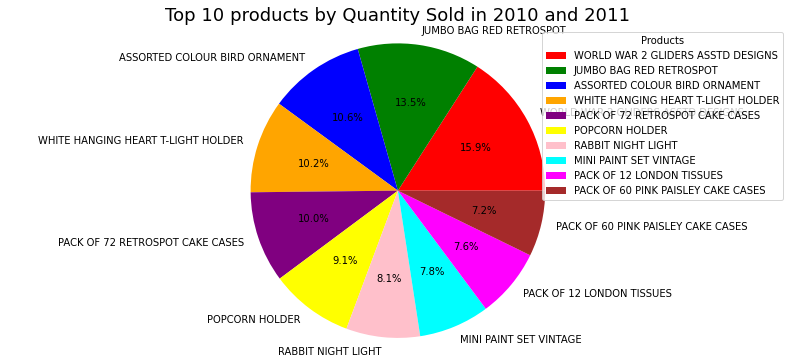

In [102]:
# Group the data by description and sum the quantities for 2011
top_products = df_copy.groupby('description')['quantity'].sum().nlargest(10)

# Sort the data in descending order
top_product = top_products.sort_values(ascending=False)

# Create a pie chart of the top 10 products by quantity sold
plt.figure(figsize=(14, 6))
colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'pink', 'cyan', 'magenta', 'brown']
plt.pie(top_products, labels=top_products.index, autopct="%1.1f%%", colors=colors)
plt.title('Top 10 products by Quantity Sold in 2010 and 2011', size = 18)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend to the pie chart
plt.legend(title="Products", loc = 'upper right')

plt.show()

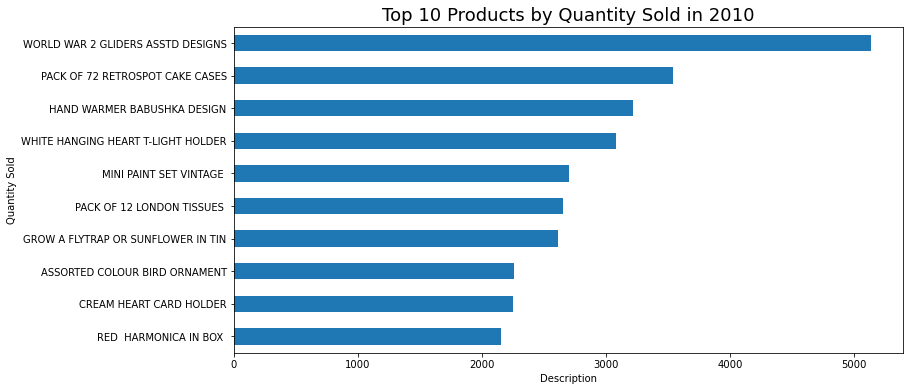

In [103]:
# Group the data by description and sum the quantities for 2010
top_products_2010 = data_2010.groupby('description')['quantity'].sum().nlargest(10)
# Sort the data in descending order
top_products_2010 = top_products_2010.sort_values(ascending=True)

# Create a bar chart
plt.figure(figsize=(12, 6))
top_products_2010.plot(kind='barh')
plt.title('Top 10 Products by Quantity Sold in 2010', size = 18)
plt.xlabel('Description')
plt.ylabel('Quantity Sold')
plt.show()

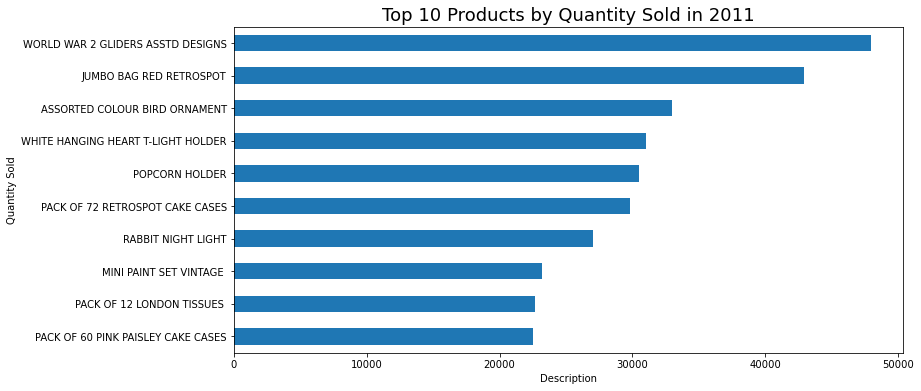

In [104]:
# Group the data by description and sum the quantities for 2010
top_products_2011 = data_2011.groupby('description')['quantity'].sum().nlargest(10)

# Sort the data in descending order
top_products_2011 = top_products_2011.sort_values(ascending=True)

# Create a bar chart
plt.figure(figsize=(12, 6))
top_products_2011.plot(kind='barh')
plt.title('Top 10 Products by Quantity Sold in 2011', size = 18)
plt.xlabel('Description')
plt.ylabel('Quantity Sold')

  
plt.show()

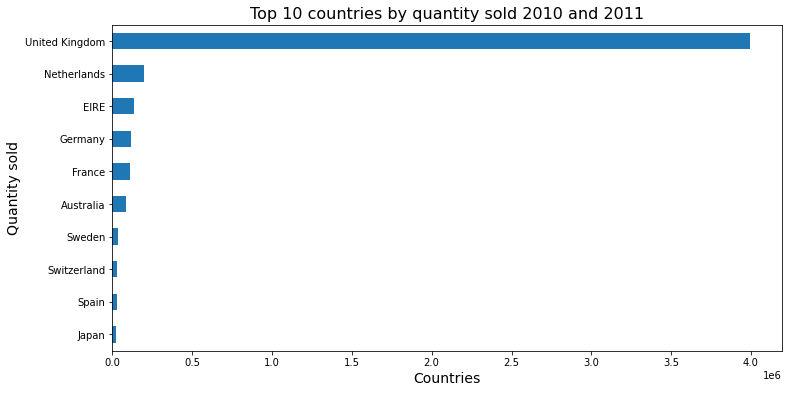

In [105]:
#bar chart of the top 10 products by quantity sold in 2010 and 2011
top_products = df_copy.groupby('country')['quantity'].sum().nlargest(10)

# Sort the data in descending order
top_products = top_products.sort_values(ascending=True)

plt.figure(figsize=(12, 6))
top_products.plot(kind='barh')

plt.xlabel('Countries', fontsize = 14)
plt.ylabel('Quantity sold', size = 14)
plt.title('Top 10 countries by quantity sold 2010 and 2011', size = 16)
plt.show()

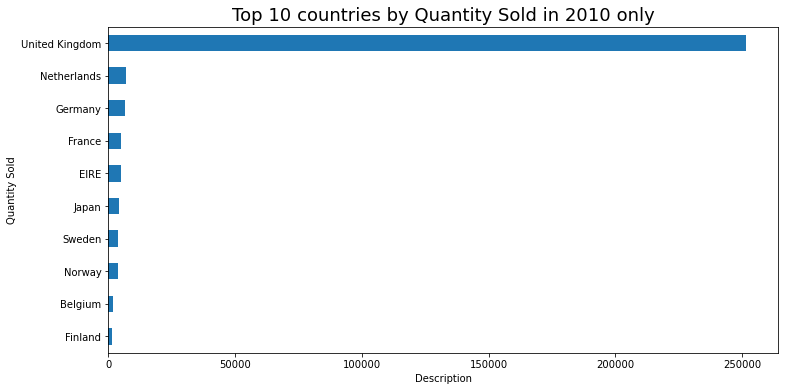

In [106]:
# Group the data by description and sum the quantities for 2010
top_products_2010 = data_2010.groupby('country')['quantity'].sum().nlargest(10)

# Sort the data in descending order
top_products_2010 = top_products_2010.sort_values(ascending=True)

# Create a bar chart
plt.figure(figsize=(12, 6))
top_products_2010.plot(kind='barh')
plt.title('Top 10 countries by Quantity Sold in 2010 only', size = 18)
plt.xlabel('Description')
plt.ylabel('Quantity Sold')

  
plt.show()

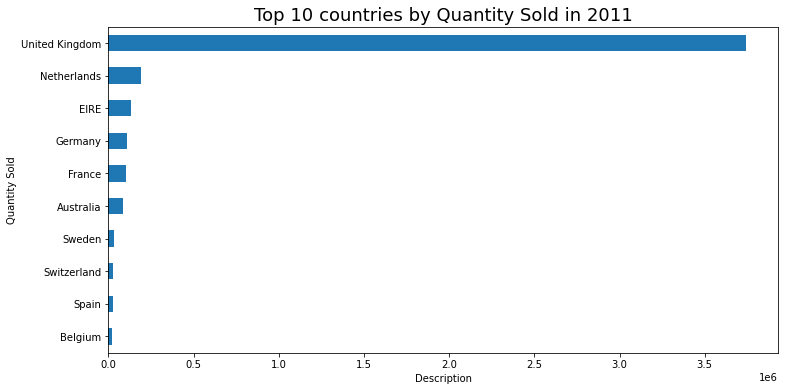

In [107]:
# Group the data by description and sum the quantities for 2010
top_products_2011 = data_2011.groupby('country')['quantity'].sum().nlargest(10)

# Sort the data in descending order
top_products_2011 = top_products_2011.sort_values(ascending=True)

# Create a bar chart
plt.figure(figsize=(12, 6))
top_products_2011.plot(kind='barh')
plt.title('Top 10 countries by Quantity Sold in 2011', size = 18)
plt.xlabel('Description')
plt.ylabel('Quantity Sold')

  
plt.show()

## Check for outliers

<AxesSubplot:xlabel='unit_price'>

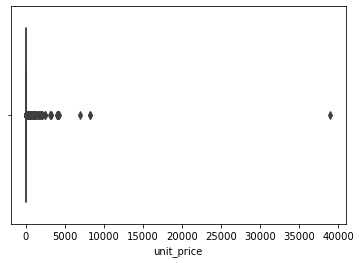

In [108]:

sns.boxplot(x = 'unit_price', data =df.copy())

<AxesSubplot:xlabel='quantity'>

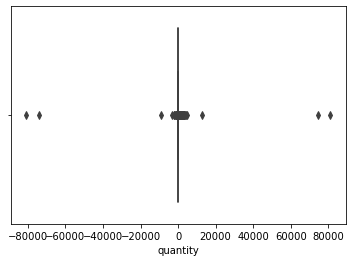

In [109]:
sns.boxplot(x = 'quantity', data =df.copy())

In [110]:
data = df.copy()

In [111]:
#define a function called "outliers" which returns a list of index of outliers
#IQR = Q3 - Q1
# +/- 1.5*IQR

def outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - (1.5*IQR)
    upper = Q3 + (1.5*IQR)
    
    ls = data.index[ (data[col] < lower) | (data[col] > upper)]
    
    return ls

In [112]:
ls

 Volume in drive C is Windows
 Volume Serial Number is FA1B-9C99

 Directory of c:\Users\philippe\Dropbox\PC\Downloads

11/04/2021  07:22 PM         4,779,679 (2012) Internet Anonymizers - How they work and how to detect their use (1).pdf
11/07/2021  11:09 AM         4,779,679 (2012) Internet Anonymizers - How they work and how to detect their use (2).pdf
11/02/2021  07:01 PM         4,779,679 (2012) Internet Anonymizers - How they work and how to detect their use.pdf
09/15/2023  09:34 PM    <DIR>          .
09/15/2023  09:34 PM    <DIR>          ..
10/05/2021  07:21 PM         5,422,080 [MS-RDPBCGR]-130808.doc
01/16/2017  05:28 PM    <DIR>          _temp_matlab_R2016b_win64
08/24/2018  11:02 AM    <DIR>          _temp_matlab_R2018a_win64
01/24/2022  11:52 AM            46,224 04cars (1).dat
01/24/2022  11:52 AM             3,330 04cars (1).txt
01/24/2022  11:54 AM            95,744 04cars data (1).xls
05/20/2022  12:01 PM           225,102 1.04.+Real-life+example.csv
12/01/2022  11:03

In [113]:
#create an empty list to store the output indices from multiple columns

index_list = []

for col in ['quantity']:
    index_list.extend(outliers(data, col))


03/28/2022  01:44 PM            10,175 CYB 674 HW 1 (3).ipynb
03/28/2022  01:53 PM            10,175 CYB 674 HW 1 (4).ipynb
03/28/2022  02:55 PM            10,175 CYB 674 HW 1 (5).ipynb
03/28/2022  02:55 PM            10,175 CYB 674 HW 1 (6).ipynb
03/28/2022  03:15 PM            10,175 CYB 674 HW 1 (7).ipynb
03/28/2022  03:16 PM            10,175 CYB 674 HW 1 (8).ipynb
03/28/2022  03:17 PM            10,175 CYB 674 HW 1 (9).ipynb
04/08/2022  11:52 AM            25,655 CYB 674 HW 1 (Philippe Kabenla).ipynb
03/21/2022  01:13 PM            10,175 CYB 674 HW 1.ipynb
04/05/2022  01:35 PM            10,111 CYB 674 HW 2 (1).ipynb
04/05/2022  01:36 PM            10,111 CYB 674 HW 2 (2).ipynb
04/11/2022  12:50 PM            50,315 CYB 674 HW 2 Philippe Kabenla (1).ipynb
04/11/2022  12:50 PM            50,315 CYB 674 HW 2 Philippe Kabenla (2).ipynb
04/11/2022  12:50 PM            50,315 CYB 674 HW 2 Philippe Kabenla.ipynb
04/04/2022  07:16 PM            10,111 CYB 674 HW 2.ipynb
04/13/2022  11:

In [114]:
# Define a function called "remove" which returns a cleaned dataframe without outliers

def remove(data, ls):
    ls = sorted(set(ls))
    data = data.drop(ls)
    return data


01/05/2021  11:58 AM            44,376 Time Management Chart Template (4).xlsx
03/27/2023  11:46 AM            79,809 Titanic.xlsx
01/16/2018  04:35 PM    <DIR>          Toolbox
11/24/2021  07:58 PM        77,060,992 torbrowser-install-win64-11.0.1_en-US.exe
03/18/2023  07:49 AM           130,862 train.csv
04/27/2021  10:42 AM           919,511 training (1).html
04/11/2021  02:03 PM           919,509 training.html
01/16/2023  07:09 PM           539,934 transcript(master).pdf
01/30/2023  08:03 PM               181 trialsql.csv
05/18/2021  08:07 PM           583,103 txhousing.csv
05/20/2022  12:41 PM             3,240 Understanding+Logistic+Regression+Tables+-+Exercise.ipynb
05/20/2022  12:41 PM             4,907 Understanding+Logistic+Regression+Tables+-+Solution.ipynb
03/17/2021  02:34 PM         2,319,872 Unemployment.xls
09/18/2018  08:48 PM            98,849 untitled (1).pdf
10/18/2018  06:31 PM             6,092 Untitled document.docx
09/18/2018  08:36 PM            90,754 untitle

In [115]:
data = remove(data, index_list)

In [116]:
data.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


<AxesSubplot:xlabel='quantity'>

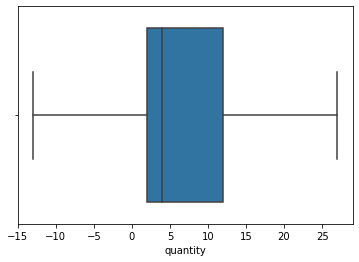

In [117]:
sns.boxplot(x = 'quantity', data =data)

### select data where quantity is >= 0

In [118]:
data = data[data['quantity'] >= 0]

In [119]:
data.describe()

,quantity,unit_price,customer_id
count,367107.000000,367107.000000,367107.000000
mean,7.094654,3.239735,15302.697279
std,6.670923,22.971365,1712.071260
min,1.000000,0.000000,12347.000000
25%,2.000000,1.250000,13975.000000
50%,4.000000,1.950000,15182.000000
75%,12.000000,3.750000,16807.000000
max,27.000000,8142.750000,18287.000000


In [120]:
data['invoice_date'] = pd.to_datetime(data['invoice_date'])

In [121]:
# Extract years and assign to the copy
data['year'] = data['invoice_date'].dt.year
data['week'] = data['invoice_date'].dt.isocalendar().week 

In [122]:
data['month'] = data['invoice_date'].dt.strftime('%B').str[:3]

In [123]:
data_2010= data[data['year'] == 2010]
data_2011= data[data['year'] == 2011]

In [124]:
data

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,year,week,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,48,Dec
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,48,Dec
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,48,Dec
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,48,Dec
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,48,Dec
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,49,Dec
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,49,Dec
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,49,Dec
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,49,Dec


In [125]:
data_2010.groupby('month')['quantity'].sum().to_frame().sort_values(by = 'quantity')

,quantity
month,
Dec,156303


In [126]:
data_2011.groupby('month')['quantity'].sum().to_frame().sort_values(by = 'quantity')


,quantity
month,
Dec,109665
Feb,132373
Jan,141357
Apr,152025
Mar,176807
Jun,178783
Jul,185895
May,192908
Aug,193690


In [127]:
data['sales'] = data['quantity']*data['unit_price']

In [128]:
data.groupby('month')['sales'].sum().to_frame().sort_values(by = 'sales')

,sales
month,
Feb,277560.820
Jan,296036.140
Apr,310501.821
Jul,353834.071
Jun,366786.830
Mar,372003.440
Aug,374302.530
May,424307.700
Dec,564435.000


Monthly sales

In [129]:
monthly_sales = data.groupby('month')['sales'].sum().to_frame()

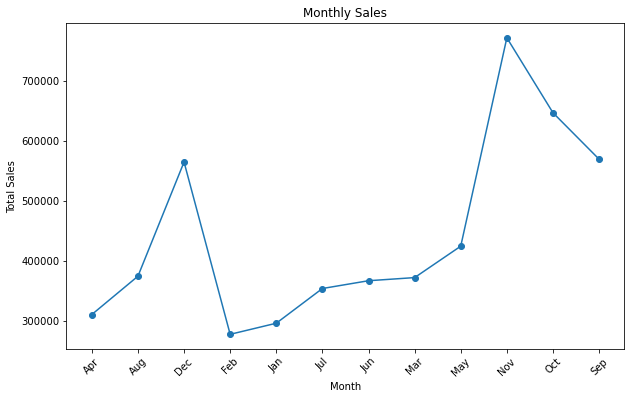

In [130]:
# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales['sales'], marker='o', linestyle='-')

plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

# Set x-axis ticks to include all months
plt.xticks(monthly_sales.index)

plt.show()

daily sales

In [144]:
data['day'] = data['invoice_date'].dt.strftime('%A').str[:3]

In [147]:
daily_sales = data.groupby('day')['sales'].sum().to_frame()

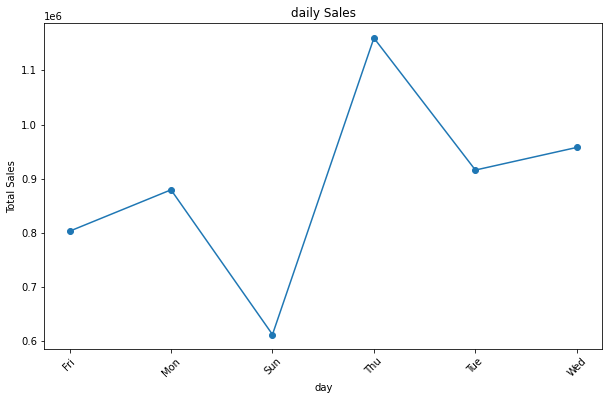

In [148]:
# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(daily_sales.index, daily_sales['sales'], marker='o', linestyle='-')

plt.title('daily Sales')
plt.xlabel('day')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

# Set x-axis ticks to include all months
plt.xticks(daily_sales.index)

plt.show()

In [152]:
data.groupby('day')['sales'].sum().to_frame().sort_values(by = 'sales')

,sales
day,
Sun,611386.931
Fri,802582.771
Mon,879175.581
Tue,915738.721
Wed,957628.550
Thu,1160081.800


Total sales per country

In [ ]:
country_sales = data.groupby('country')['sales'].sum().nlargest(15)
country_sales = country_sales.sort_values( ascending = True)

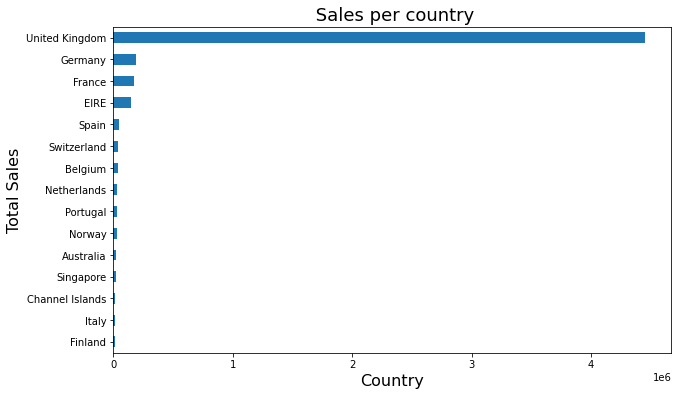

In [149]:
# Create a line plot
plt.figure(figsize=(10, 6))
country_sales.plot(kind = 'barh')

plt.title(' Sales per country', size = 18)
plt.xlabel('Country', size = 16)
plt.ylabel('Total Sales', size = 16)

plt.show()

In [153]:
data.groupby('country')['sales'].sum().to_frame().sort_values(by = 'sales')

,sales
country,
Saudi Arabia,145.920
Bahrain,353.400
Czech Republic,634.540
RSA,1002.310
Brazil,1143.600
Lithuania,1266.860
European Community,1300.250
Lebanon,1693.880
United Arab Emirates,1756.840


Conclusion and recommendation

* Busiest Sales Months: The months of November and October have demonstrated the highest sales activity, with revenues of $771,242.59 and $646,460.51, respectively. These months stand out as peak periods for customer purchases.

* Peak Sales Day: Thursday emerges as the most lucrative day, contributing significantly to overall sales with a total revenue of $1,160,081.80. Following closely behind are Wednesday and Tuesday, showcasing substantial sales figures.

* Top Customer: The United Kingdom is the most valuable customer, having generated a substantial $445,642.33 in sales. This customer's consistent patronage plays a pivotal role in the company's revenue stream.

* Best Selling Products: The best-selling products are "World War 2 Gliders Assisted Designs" and "Jumbo Bag Red Retrospot," accounting for 15.9% and 13.5% of total sales, respectively. These products demonstrate a strong market demand.

recommendation

* Focus marketing and sales efforts on the busiest months and days of the week. This could involve running targeted promotions or offering special discounts.

* Invest in customer loyalty programs to retain your most valuable customers. This could include offering rewards for repeat purchases or providing early access to new products.

* Highlight your best-selling products on your website and in marketing materials. You could also consider creating product bundles or offering discounts on related products.